In [1]:
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras import Model
import numpy as np

In [2]:
input_tensor = Input(shape=(784, ), name='input_layer')
x_tensor = Dense(64, activation='relu', name = 'Dense01')(input_tensor)
x_tensor = Dense(64, activation='relu', name = 'Dense02')(x_tensor)
output_tensor = Dense(10, activation='softmax', name = 'output_layer')(x_tensor)

In [3]:
model1 = Model(inputs=input_tensor, outputs=output_tensor)

In [4]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 784)]             0         
                                                                 
 Dense01 (Dense)             (None, 64)                50240     
                                                                 
 Dense02 (Dense)             (None, 64)                4160      
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Nuevo modelo a partir de `Model1`

In [5]:
input_tensor_2 = Input(shape=(784, ), name='input_layer')
x_tensor_2 = model1(input_tensor_2) # Utilizamos el model1 como una capa
x_tensor_2 = Dense(32, activation='relu', name = 'Dense04')(x_tensor_2)
x_tensor_2 = Dense(16, activation='relu', name = 'Dense05')(x_tensor_2)
output_tensor_2 = Dense(1, activation='softmax', name = 'output_layer')(x_tensor_2)

In [6]:
newModel = Model(inputs=input_tensor_2, outputs=output_tensor_2)

In [7]:
newModel.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 784)]             0         
                                                                 
 model (Functional)          (None, 10)                55050     
                                                                 
 Dense04 (Dense)             (None, 32)                352       
                                                                 
 Dense05 (Dense)             (None, 16)                528       
                                                                 
 output_layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 55947 (218.54 KB)
Trainable params: 55947 (218.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Flatten

In [9]:
my_input_tensor = Input(shape = (128, 128, 3))
vgg = VGG16(weights= 'imagenet', include_top = False, input_tensor = my_input_tensor)
vgg.trainable = False
output_vgg = vgg.output

x_tensor_3 = Flatten()(output_vgg)
x_tensor_3 = Dense(32, activation = 'relu', name = 'Dense05')(x_tensor_3)
x_tensor_3 = Dense(16, activation = 'relu', name = 'Dense06')(x_tensor_3)
output_tensor_3 = Dense(1, activation = 'sigmoid', name = 'output_layer')(x_tensor_3)

In [10]:
model2 = Model(inputs=my_input_tensor, outputs=output_tensor_3)

In [11]:
model2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

# Módulo 3 - Actividad 8 - Construcción de Redes Neuronales Convolucionales (topología no secuencial)

Objetivo

Esta actividad tiene como objetivo  implementar, mediante el uso del API funcional de Keras, redes neuronales convolucionales que tengan múltiples entradas, múltiples salidas o salidas con tensores compuestos. Esto te será de utilidad al abordar problemas en donde se requieran de datos multimodales (imágenes, audio, texto, etc.) para entrenar un modelo y cuando se requiera que los modelos realicen múltiples tareas de forma simultanea (clasificación y localización, detección de objetos, tracking, etc.).



Descripción

A continuación encontrarás la descripción de diversas arquitecturas, implementa cada una de ellas utilizando el API Funcional de Keras. El entregable de la actividad será un archivo comprimido que contenga:
- Implementación de todas las redes neuronales (*.ipynb o *.py)
- Pruebas documentadas de cada red neuronal con tensores de entrada y salida.

1) Para iniciar, construyamos una arquitectura con una entrada y dos salidas: Modelo Y



In [12]:
input_tensor_y = Input(shape = (28,28))
x_tensor_y = Flatten(name='flatten_y')(input_tensor_y)
x_tensor_y = Dense(32, activation = 'relu', name = 'Dense_Y')(x_tensor_y)
x_tensor_y = Dense(64, activation = 'relu', name = 'Dense_Y1')(x_tensor_y)

output_tensor_y1 = Dense(50, activation = 'softmax', name = 'output_layer_y1')(x_tensor_y)
output_tensor_y2 = Dense(4, name = 'output_layer_y2')(x_tensor_y)

outputs = [output_tensor_y1, output_tensor_y2]

ModelY = Model(inputs=input_tensor_y, outputs=outputs)

ModelY.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 28, 28)]             0         []                            
                                                                                                  
 flatten_y (Flatten)         (None, 784)                  0         ['input_2[0][0]']             
                                                                                                  
 Dense_Y (Dense)             (None, 32)                   25120     ['flatten_y[0][0]']           
                                                                                                  
 Dense_Y1 (Dense)            (None, 64)                   2112      ['Dense_Y[0][0]']             
                                                                                            

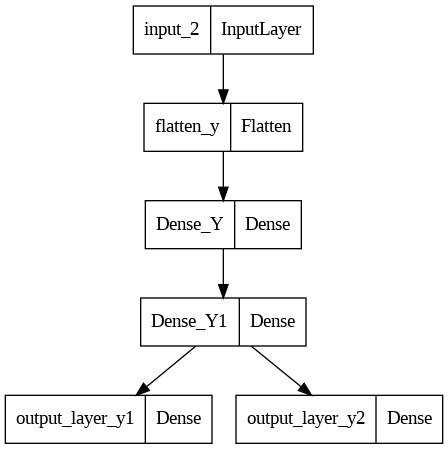

In [13]:
from tensorflow.keras.utils import plot_model

plot_model(ModelY)

In [14]:
input_data = np.random.rand(10, 28, 28)
output_data = ModelY.predict(input_data)

for i, out in enumerate(output_data):
    print(f"Forma de salida {i + 1}: {out.shape}")

1/1 [==============================] - 0s 290ms/step
Forma de salida 1: (10, 50)
Forma de salida 2: (10, 4)


2) Ahora, implementemos una arquitectura que tenga dos entradas y una salida: Modelo T.

In [15]:
# lado izq
input_tensor_t1 = Input(shape = (256,256))
x_tensor_t = Flatten(name='flatten_t')(input_tensor_t1)
x_tensor_t = Dense(32, activation = 'relu', name = 'Dense_T1')(x_tensor_t)

# lado der
input_tensor_t2 = Input(shape = (100))
x_tensor_t1 = Dense(32, activation = 'relu', name = 'Dense_T2')(input_tensor_t2)

# merge
x_tensor_t2 = Concatenate(axis=1)([x_tensor_t, x_tensor_t1])
x_tensor_t3 = Dense(16, name = 'Dense_T3')(x_tensor_t2)

output_tensor_t = Dense(4, name = 'output_layer_t')(x_tensor_t3)

inputs = [input_tensor_t1, input_tensor_t2]

ModelT = Model(inputs=inputs, outputs=output_tensor_t)

ModelT.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256)]           0         []                            
                                                                                                  
 flatten_t (Flatten)         (None, 65536)                0         ['input_3[0][0]']             
                                                                                                  
 input_4 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 Dense_T1 (Dense)            (None, 32)                   2097184   ['flatten_t[0][0]']           
                                                                                            

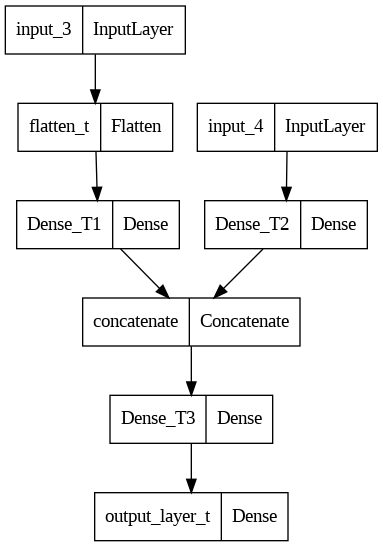

In [16]:
plot_model(ModelT)

In [17]:
input_x_data = np.random.rand(5, 256, 256)
input_y_data = np.random.rand(5, 100)

output_data = ModelT.predict([input_x_data, input_y_data])

print("Forma de salida:", output_data.shape)

1/1 [==============================] - 0s 117ms/step
Forma de salida: (5, 4)


3) Finalmente, implementemos una arquitectura que incluya un bloque funcional: Modelo R. En este caso, se trata de una arquitectur a que incorpora un bloque residual, y es tu responsabilidad determinar las características de las capasConv2D, MaxPool y Add.


In [18]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Add

input_tensor_r = Input(shape=(64, 64, 3), name='capa_entrada')

tensor_conv_r = Conv2D(filters=1, kernel_size=(2, 3), padding='same', strides=1)(input_tensor_r)
tensor_max_r = MaxPooling2D(pool_size=(2, 2), strides=(1, 1))(tensor_conv_r)
tensor_conv_r2 = Conv2D(filters=1, kernel_size=(2, 3), padding='same', strides=1)(tensor_max_r)


tensor_add= Add()([tensor_conv_r2, tensor_max_r])
tensor_flatten = Flatten()(tensor_add)
tensor_dense = Dense(1, activation='relu')(tensor_flatten)

ModelR = Model(inputs=input_tensor_r, outputs=tensor_dense)

ModelR.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 capa_entrada (InputLayer)   [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 64, 64, 1)            19        ['capa_entrada[0][0]']        
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 63, 63, 1)            0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 63, 63, 1)            7         ['max_pooling2d[0][0]'] 

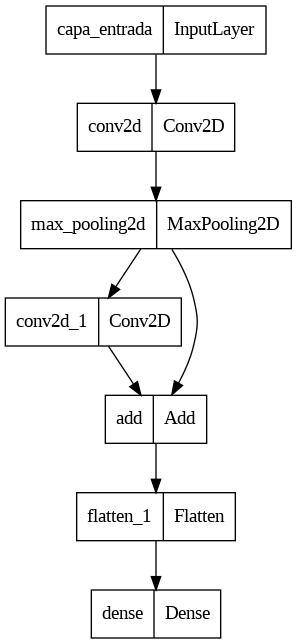

In [19]:
plot_model(ModelR)

In [20]:
input_data = np.random.rand(15, 64, 64, 3)
output_data = ModelR.predict(input_data)

print("Forma de salida:", output_data.shape)

1/1 [==============================] - 0s 133ms/step
Forma de salida: (15, 1)


4) Construyamos la siguiente arquitectura de modelo a la que llamaremos YV1. En este caso, la capa de salida no es Dense.

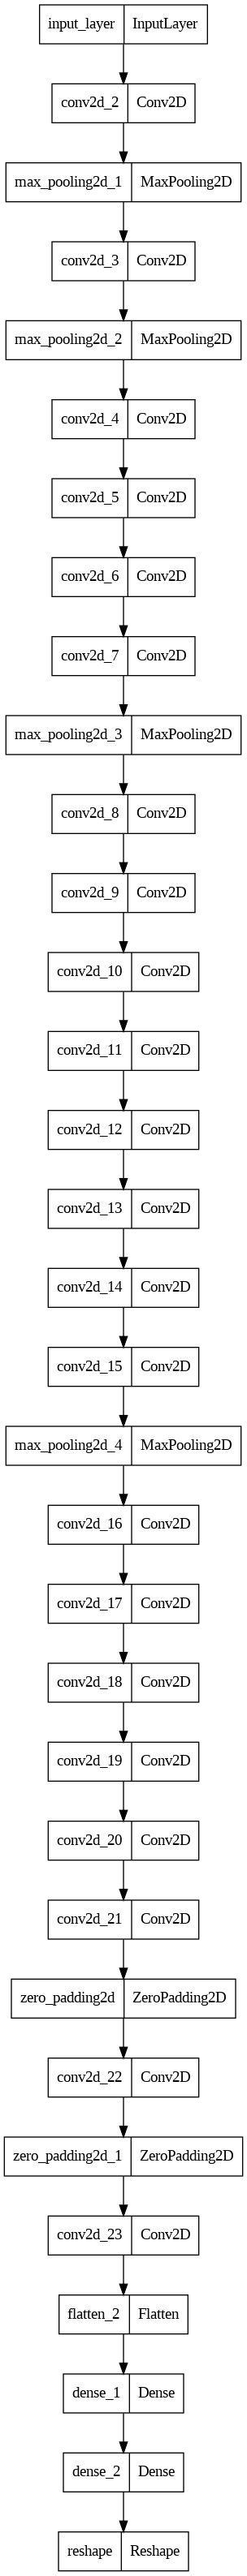

In [21]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Add, Flatten, ZeroPadding2D, Reshape

input_tensor = Input(shape=(448, 448, 3), name='input_layer')

# Convolutional layers
x_tensor = Conv2D(64, (7, 7), strides=(2), padding='same')(input_tensor)
x_tensor = MaxPooling2D((2, 2), strides=(2), padding='same')(x_tensor)

x_tensor = Conv2D(192, (3, 3), strides=(1), padding='same')(x_tensor)
x_tensor = MaxPooling2D((2, 2), strides=(2, 2), padding='same')(x_tensor)

x_tensor = Conv2D(128, (1, 1), padding='same')(x_tensor)
x_tensor = Conv2D(256, (3, 3), padding='same')(x_tensor)
x_tensor = Conv2D(256, (1, 1), padding='same')(x_tensor)
x_tensor = Conv2D(512, (3, 3), padding='same')(x_tensor)
x_tensor = MaxPooling2D((2, 2), strides=(2), padding='same')(x_tensor)

x_tensor = Conv2D(256, (1, 1), padding='same')(x_tensor)
x_tensor = Conv2D(512, (3, 3), padding='same')(x_tensor)
x_tensor = Conv2D(256, (1, 1), padding='same')(x_tensor)
x_tensor = Conv2D(512, (3, 3), padding='same')(x_tensor)
x_tensor = Conv2D(256, (1, 1), padding='same')(x_tensor)
x_tensor = Conv2D(512, (3, 3), padding='same')(x_tensor)
x_tensor = Conv2D(256, (1, 1), padding='same')(x_tensor)
x_tensor = Conv2D(512, (3, 3), padding='same')(x_tensor)
x_tensor = MaxPooling2D((2, 2), strides=(2), padding='same')(x_tensor)

x_tensor = Conv2D(512, (1, 1), padding='same')(x_tensor)
x_tensor = Conv2D(1024, (3, 3), padding='same')(x_tensor)
x_tensor = Conv2D(512, (1, 1), padding='same')(x_tensor)
x_tensor = Conv2D(1024, (3, 3), padding='same')(x_tensor)
x_tensor = Conv2D(1024, (3, 3), padding='same')(x_tensor)
x_tensor = Conv2D(1024, (3, 3), strides=(2), padding='same')(x_tensor)

x_tensor = ZeroPadding2D((1, 1))(x_tensor)
x_tensor = Conv2D(1024, (3, 3), padding='same')(x_tensor)
x_tensor = ZeroPadding2D((1, 1))(x_tensor)
x_tensor = Conv2D(1024, (3, 3), padding='same')(x_tensor)

# Fully connected layers
x_tensor = Flatten()(x_tensor)
x_tensor = Dense(4096)(x_tensor)

# Output layer
x_tensor = Dense(7 * 7 * 30)(x_tensor)
output_tensor = Reshape((7, 7, 30))(x_tensor)

ModelYV1 = Model(inputs=input_tensor, outputs=output_tensor)

plot_model(ModelYV1)

In [22]:
input_data = np.random.rand(3, 448, 448, 3)

output_data = ModelYV1.predict(input_data)

print("Forma de salida:", output_data.shape)

1/1 [==============================] - 2s 2s/step
Forma de salida: (3, 7, 7, 30)
